# Практическая работа №3
# Регрессионный анализ
Регрессионный анализ - это статистический аналитический метод, который позволяет вычислить предполагаемые отношения между зависимой переменной и несколькими независимыми переменными. Регрессионный анализ используется для предсказания значения зависимой переменной на основе значений независимых переменных
Регрессионный анализ делает это путем построения уравнения регрессии, которое описывает функциональную зависимость между переменными. Уравнение регрессии содержит коэффициенты, которые показывают направление и силу взаимодействия между переменными. Регрессионный анализ также дает статистические показатели.

## Импорт необходимых библиотек

In [265]:
import warnings

warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, \
    Lars, TweedieRegressor, BayesianRidge, LassoLars
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import mutual_info_classif, RFE, SelectKBest, \
    chi2, SelectFromModel, SequentialFeatureSelector
from scipy.stats import t
from typing import Union
from itertools import product
import pandas as pd
import statsmodels.api as sm
from functions import compare_regression_models
import numpy as np
from math import log
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [266]:
dataframe_train = pd.read_csv("../data/train.csv")
dataframe_test = pd.read_csv("../data/test.csv")
dataframe_train.head(10)

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,896,2,0,46.0,3,5,0,0,0,0,...,2,3,0,7,3,13,2,7,18,2350000.0
1,399,2,0,44.6,5,5,0,0,0,0,...,3,5,0,7,3,11,1,4,11,1799000.0
2,1515,2,0,53.0,1,9,0,1,0,0,...,4,11,0,5,3,17,3,7,15,2800000.0
3,1216,2,0,64.0,4,5,0,0,0,1,...,31,5,1,55,2,10,28,32,17,3970000.0
4,677,1,0,33.3,1,10,0,0,1,0,...,1,3,0,2,3,9,0,3,6,1880000.0
5,1210,2,0,46.0,3,4,0,0,0,0,...,38,6,2,15,0,27,9,11,25,2400000.0
6,1485,1,0,45.0,8,9,0,1,0,0,...,8,9,0,8,1,33,4,4,15,2870000.0
7,1557,2,0,54.5,3,14,0,1,0,0,...,11,4,1,12,4,15,2,14,14,2700000.0
8,1482,4,0,86.0,1,10,0,1,0,0,...,16,11,0,9,2,42,12,10,30,3200000.0
9,295,2,0,42.0,2,5,0,0,0,0,...,22,5,0,10,1,13,2,13,17,2560000.0


Выведем информацию о таблицах.

In [267]:
dataframe_train.info()
dataframe_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         808 non-null    int64  
 1   Количество.комнат          808 non-null    int64  
 2   Студия                     808 non-null    int64  
 3   Общая.площадь              808 non-null    float64
 4   Этаж                       808 non-null    int64  
 5   Этажей.в.доме              808 non-null    int64  
 6   Парковка                   808 non-null    int64  
 7   Без.ремонта                808 non-null    int64  
 8   Дизайнерский               808 non-null    int64  
 9   Евроремонт                 808 non-null    int64  
 10  Косметический              808 non-null    int64  
 11  Балкон                     808 non-null    int64  
 12  Лоджия                     808 non-null    int64  
 13  Совмещенный.санузел        808 non-null    int64  

In [268]:
dataframe_train.isnull().sum()

id                           0
Количество.комнат            0
Студия                       0
Общая.площадь                0
Этаж                         0
Этажей.в.доме                0
Парковка                     0
Без.ремонта                  0
Дизайнерский                 0
Евроремонт                   0
Косметический                0
Балкон                       0
Лоджия                       0
Совмещенный.санузел          0
Раздельный.санузел           0
Лифт                         0
Грузовой.лифт                0
Мусоропровод                 0
Год.постройки                0
Аварийный                    0
Железобетонные.перекрытия    0
Смешанные.перекрытия         0
Деревянные.перекрытия        0
Иные.перекрытия              0
Панельные.стены              0
Блочные.стены                0
Деревянные.стены             0
Кирпичные.стены              0
Монолитные.стены             0
Смешанные.стены              0
Школа.1000                   0
ВУЗ.1000                     0
ТЦ.1000 

Из вывода видно, что в столбцах нет пустых значений.

In [269]:
dataframe_train.describe()

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,794.887376,2.039604,0.040842,50.781176,4.894802,8.935644,0.142327,0.101485,0.024752,0.101485,...,10.372525,4.674505,0.143564,7.788366,2.501238,13.263614,4.149752,6.754950,13.470297,2.699083e+06
std,461.218298,0.996109,0.198046,19.827507,3.760826,4.754526,0.349601,0.302157,0.155466,0.302157,...,15.397133,3.255991,0.378064,8.983450,1.636025,7.557860,5.955523,6.873569,8.068579,1.096460e+06
min,1.000000,1.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,406.500000,1.000000,0.000000,37.650000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,2.000000,7.000000,1.950000e+06
50%,774.500000,2.000000,0.000000,48.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,0.000000,6.000000,2.000000,13.000000,3.000000,5.000000,12.000000,2.550000e+06
75%,1181.500000,3.000000,0.000000,63.075000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,7.000000,0.000000,9.000000,4.000000,18.000000,5.000000,10.000000,19.000000,3.310000e+06
max,1615.000000,5.000000,1.000000,120.000000,24.000000,26.000000,1.000000,1.000000,1.000000,1.000000,...,86.000000,14.000000,2.000000,67.000000,8.000000,42.000000,52.000000,40.000000,40.000000,6.800000e+06


Изначально уже проведено кодирование категориальных признаков. Чтобы избежать «ловушки фиктивной переменной», необходимо сделать следующее: если у нас n вариантов категориального признака, то надо оставить n-1 фиктивных колонок после одноразового кодирования. Оставляя n-1 фиктивных колонок, мы убираем линейную зависимость между фиктивными колонками и делаем нашу модель более стабильной и точной.

In [270]:
dataframe_train.drop("Евроремонт", axis=1, inplace=True)
dataframe_train.drop("Совмещенный.санузел", axis=1, inplace=True)
dataframe_train.drop("Деревянные.перекрытия", axis=1, inplace=True)
dataframe_train.drop("Деревянные.стены", axis=1, inplace=True)

Так как признак id не играет важной роли в предсказании, то можем удалить его из датафреймов.

In [271]:
dataframe_train.drop("id", axis=1, inplace=True)
test_ids = dataframe_test["id"]
dataframe_test.drop("id", axis=1, inplace=True)

Разделим наши признаки на категориальные и числовые.

In [272]:
result_column = "Цена"

# Получаем серию с количеством уникальных значений в каждом столбце
nunique = dataframe_train.nunique()

# Фильтруем серию по условию (в данном случае выбираем столбцы с более чем 5 уникальными значениями)
first_nunique = nunique[nunique > 5]

second_nunique = nunique[nunique <= 5]

# Получаем индекс отфильтрованной серии
first_index = first_nunique.index
second_index = second_nunique.index

# Преобразуем индекс в список
dataframe_numerical = first_index.tolist()
dataframe_numerical.remove(result_column)

# Преобразуем индекс в список
dataframe_categorical = second_index.tolist()

dataframe_all = dataframe_numerical + dataframe_categorical
dataframe_categorical

['Количество.комнат',
 'Студия',
 'Парковка',
 'Без.ремонта',
 'Дизайнерский',
 'Косметический',
 'Балкон',
 'Лоджия',
 'Раздельный.санузел',
 'Лифт',
 'Грузовой.лифт',
 'Мусоропровод',
 'Аварийный',
 'Железобетонные.перекрытия',
 'Смешанные.перекрытия',
 'Иные.перекрытия',
 'Панельные.стены',
 'Блочные.стены',
 'Кирпичные.стены',
 'Монолитные.стены',
 'Смешанные.стены',
 'Парк.1000',
 'Кинотеатр.1000']

In [273]:
dataframe_numerical

['Общая.площадь',
 'Этаж',
 'Этажей.в.доме',
 'Год.постройки',
 'Школа.1000',
 'ВУЗ.1000',
 'ТЦ.1000',
 'Стоматология.1000',
 'Почта.1000',
 'Поликлиника.1000',
 'Остановка.1000',
 'Одежда..1000',
 'Супер3кет.1000',
 'Кафе.1000',
 'АЗС.1000',
 'Детский.сад.1000',
 'Бар.1000',
 'Банк.1000',
 'Аптека.1000']

Произведём нормирование числовых признаков.

In [274]:
min_max_scaler = MinMaxScaler()
dataframe_train[dataframe_numerical] = min_max_scaler.fit_transform(
    dataframe_train[dataframe_numerical])
dataframe_test[dataframe_numerical] = min_max_scaler.fit_transform(
    dataframe_test[dataframe_numerical])
dataframe_train.describe()

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Косметический,Балкон,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,2.039604,0.040842,0.370738,0.169339,0.288985,0.142327,0.101485,0.024752,0.772277,0.632426,...,0.120611,0.333893,0.143564,0.116244,0.312655,0.315800,0.079803,0.168874,0.336757,2.699083e+06
std,0.996109,0.198046,0.180250,0.163514,0.198105,0.349601,0.302157,0.155466,0.419622,0.635417,...,0.179036,0.232571,0.378064,0.134081,0.204503,0.179949,0.114529,0.171839,0.201714,1.096460e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,1.000000,0.000000,0.251364,0.043478,0.125000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.023256,0.142857,0.000000,0.044776,0.125000,0.190476,0.019231,0.050000,0.175000,1.950000e+06
50%,2.000000,0.000000,0.345455,0.130435,0.291667,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.046512,0.285714,0.000000,0.089552,0.250000,0.309524,0.057692,0.125000,0.300000,2.550000e+06
75%,3.000000,0.000000,0.482500,0.217391,0.333333,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.139535,0.500000,0.000000,0.134328,0.500000,0.428571,0.096154,0.250000,0.475000,3.310000e+06
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.800000e+06


## Тепловые карты

Создадим тепловую карту из корреляционной матрицы (Корреляционная матрица - это квадратная таблица, которая показывает коэффициенты корреляции между несколькими переменными. Коэффициент корреляции - это мера линейной связи между двумя переменными, которая может принимать значения от -1 до 1. Корреляционная матрица позволяет видеть закономерности и взаимосвязи между переменными). Тепловая карта - это вид графика, который показывает данные в виде цветных прямоугольных плиток.

In [275]:
corr_matrix = dataframe_train.corr()  # Матрица корреляции между всеми столбцами датафрейма

In [276]:
def draw_large_heat_map(dataframe: pd.DataFrame, annot: bool, size: int) -> None:
    """
    Рисует большую тепловую карту
    :param dataframe: Датафрейм
    :param annot: Нужны ли числа на графике
    :param size: Размер
    :return: None
    """
    sb.set(font_scale=2)
    sb.heatmap(dataframe.corr(), annot=annot, cmap='coolwarm', linewidths=0.2,)
    # Добавляем заголовок и подписи осей
    plt.title('Корреляция между признаками dataframe_train')
    plt.xlabel('Признаки')
    plt.ylabel('Признаки')

    fig = plt.gcf()
    fig.set_size_inches(size, size)

    plt.show()

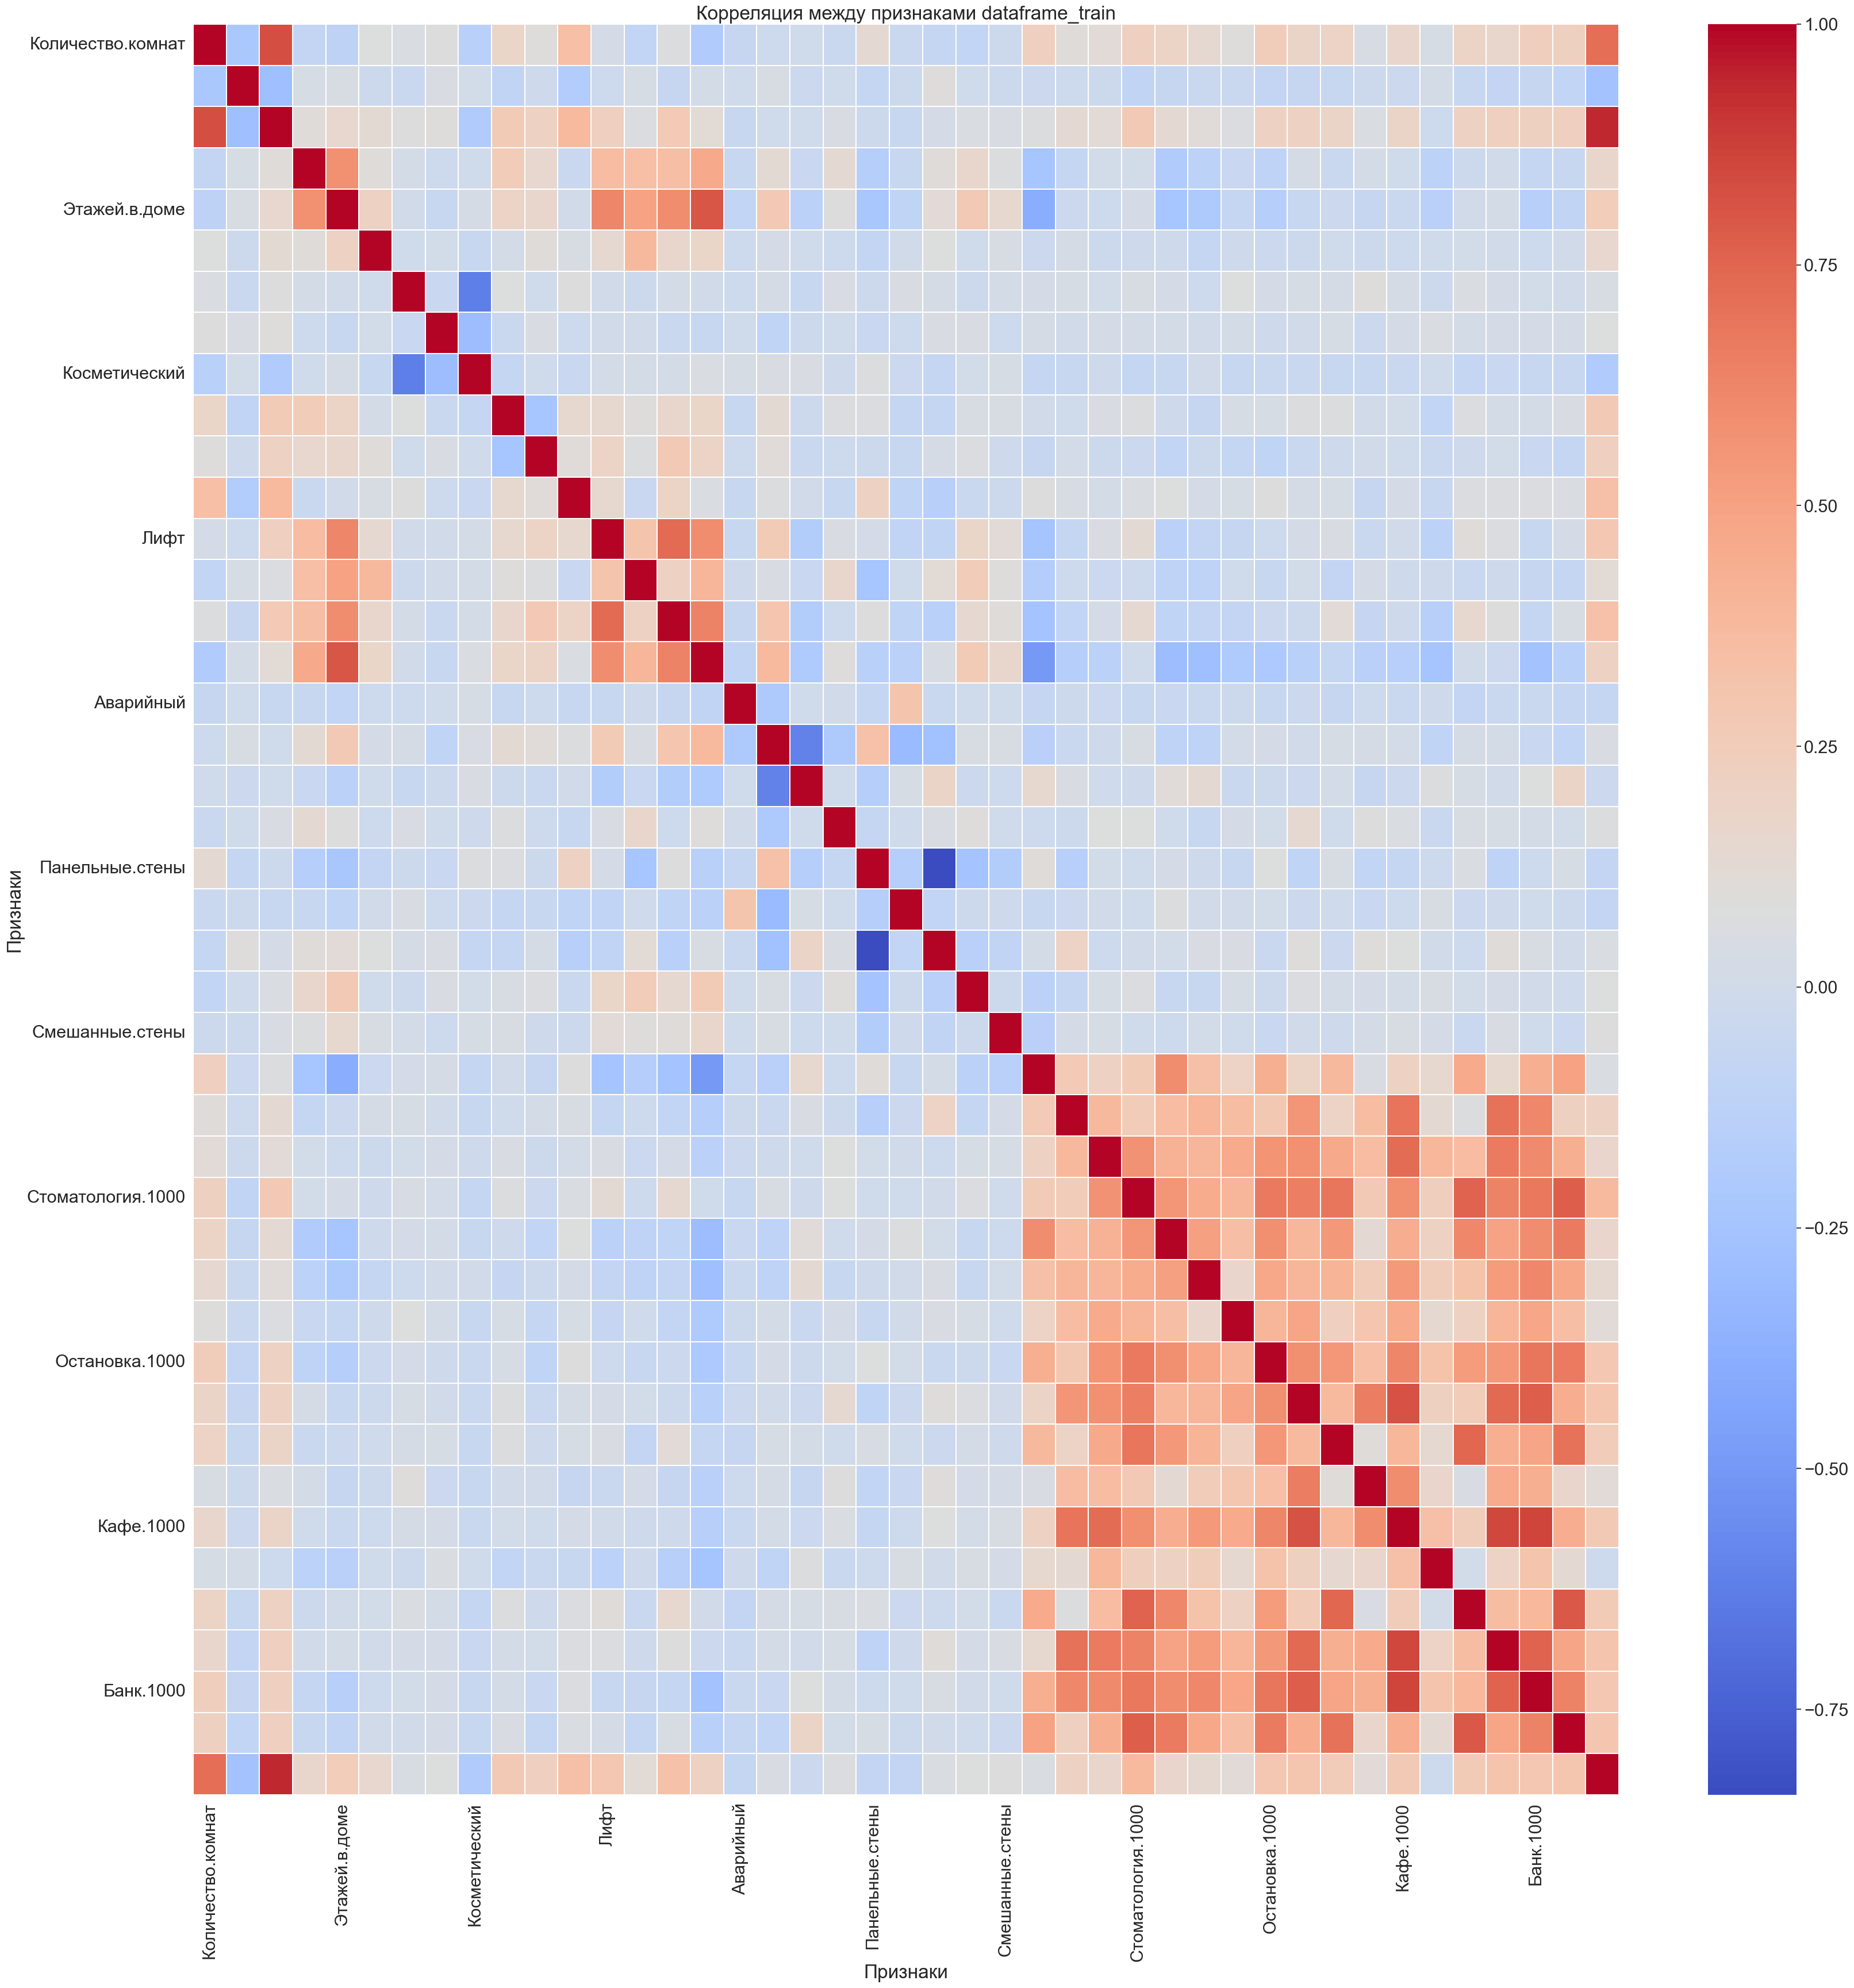

In [277]:
draw_large_heat_map(dataframe_train, False, 40)

Для более наглядного вида выведем корреляцию в более удобном формате.

In [278]:
def show_heat_map(colums: list, title: str):
    """
    Тепловая карта для признаков
    :param colums: Список признаков, которые будут на тепловой карте
    :param title: Название
    :return: None
    """
    corr_price_dataframe = dataframe_train.corr()[['Цена']].transpose()[colums]
    # Строим тепловую карту для визуализации корреляционной матрицы
    sb.heatmap(corr_price_dataframe, annot=True, fmt='.1g', vmin=-1, vmax=1,
               cmap='coolwarm')

    # Устанавливаем размер изображения
    fig = plt.gcf()
    fig.set_size_inches(35, 5)

    plt.title(f"Корреляция между ценой и {title} признаками")
    plt.show()

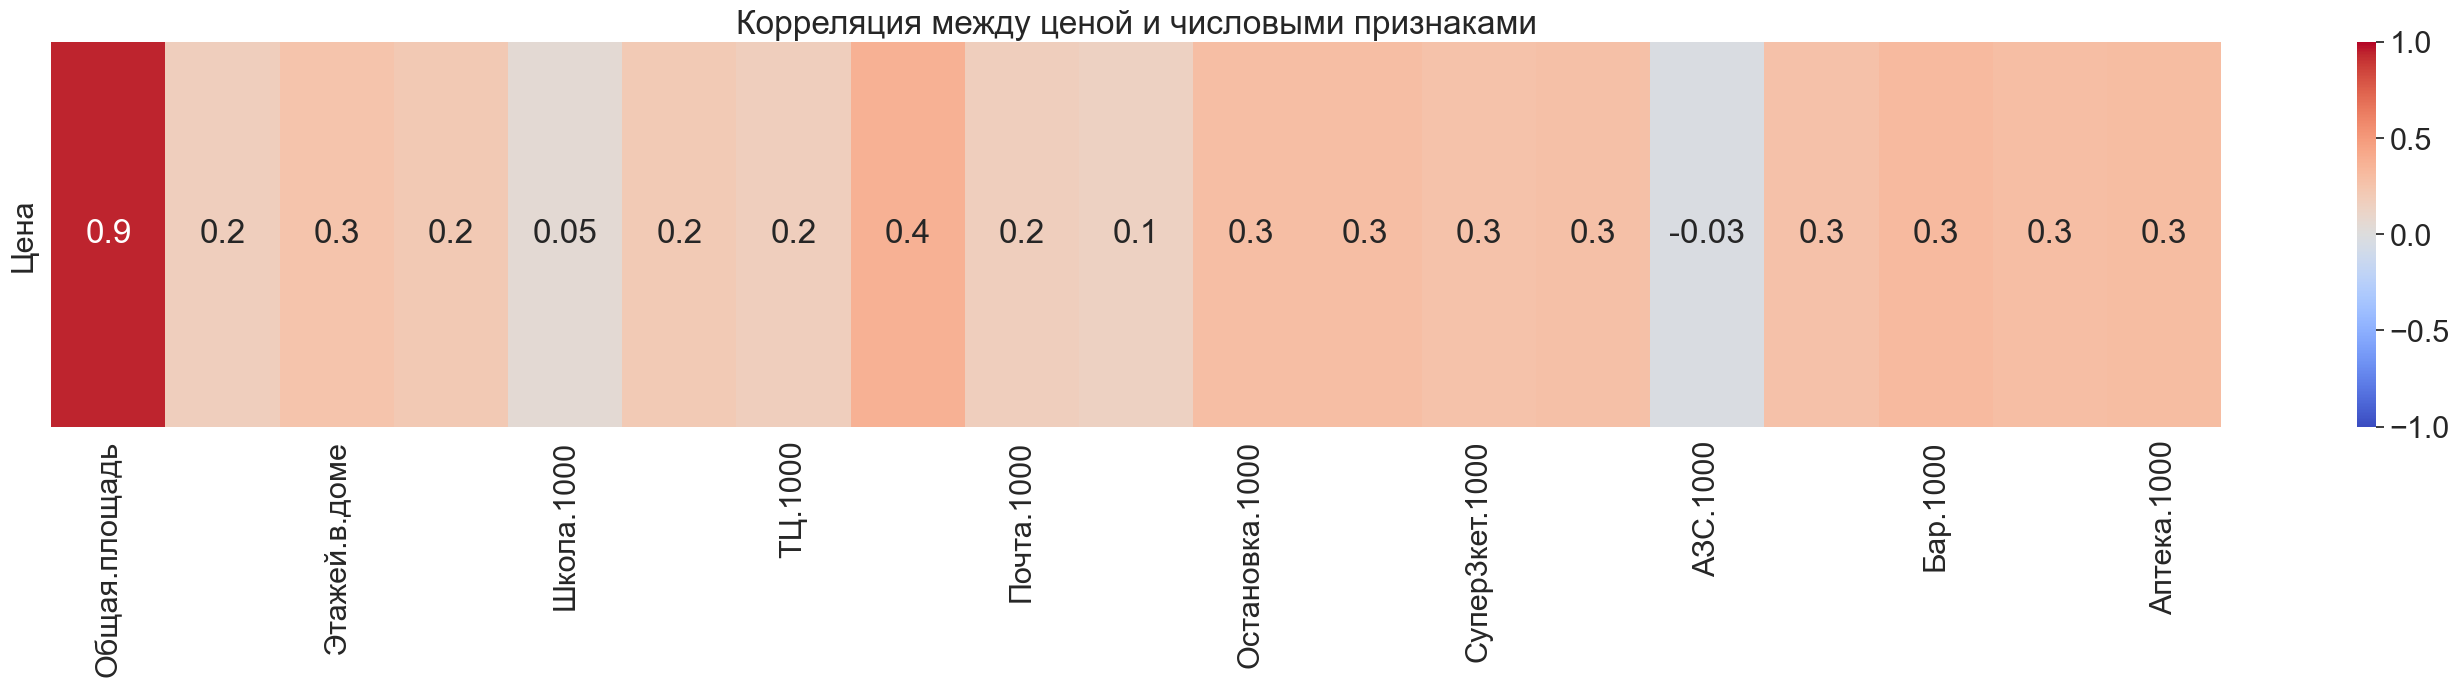

In [279]:
show_heat_map(dataframe_numerical, "числовыми")

### Удалим признаки, которые слабо коррелируют с зависимой переменной
Так как у нас много с корреляцией 0.3, выберем значение 0.29. Так мы сохраним больше информации и повысим точность предсказания.

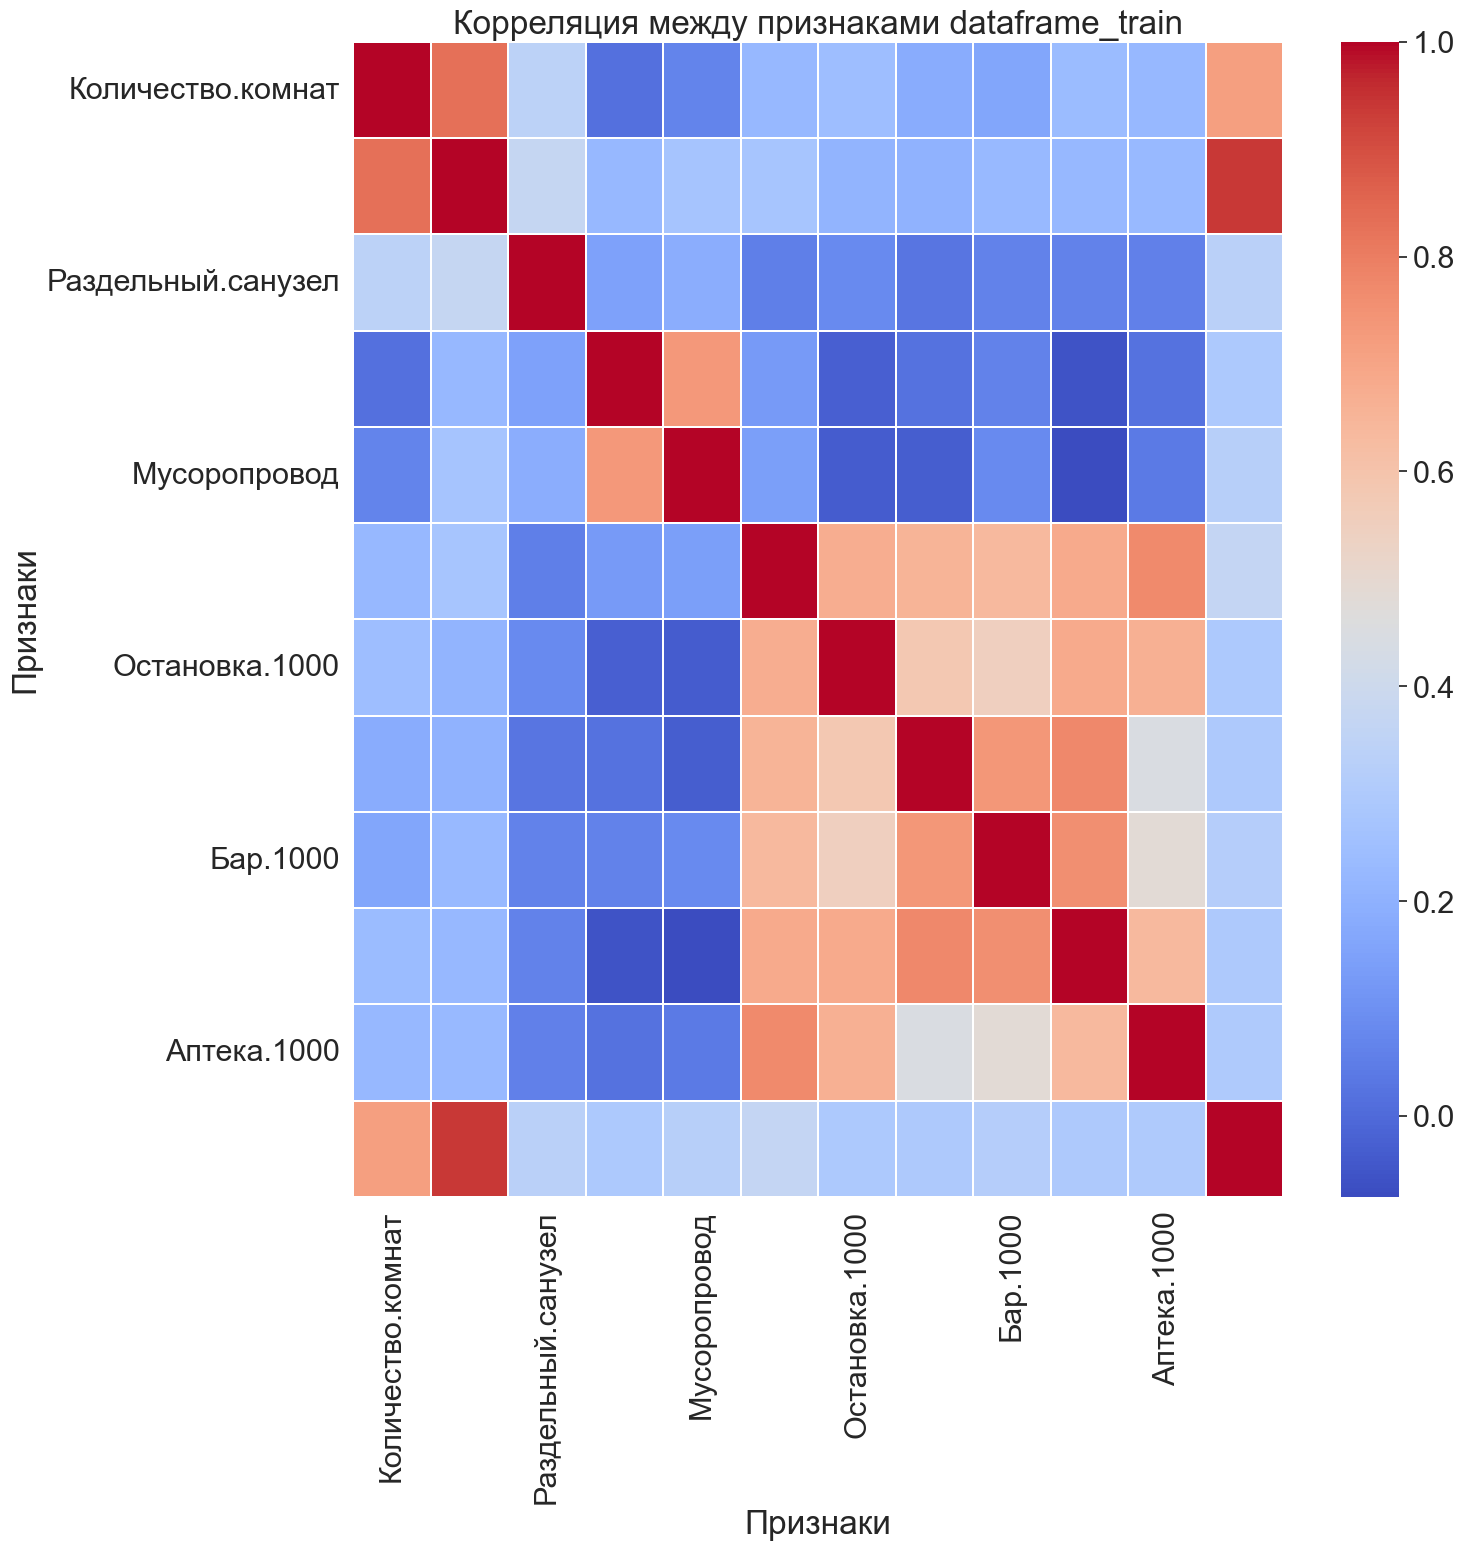

In [280]:
threshold = 0.29  # Пороговое значение для отбора признаков по корреляции с зависимой переменной

# Вычисляем серию значений корреляции между каждым столбцом датафрейма и зависимой переменной, берём модуль от этих значений
corr_price_matrix = dataframe_train.corrwith(dataframe_train[result_column]).abs()

# Создаём множество из имен столбцов, которые имеют корреляцию с ценой меньше или равную threshold
weak_corr_features = set(corr_matrix[corr_price_matrix <= threshold].index)
dataframe_train.drop(weak_corr_features, axis=1, inplace=True)

draw_large_heat_map(dataframe_train, False, 15)

### Удаление признаков, которые сильно коррелируют друг с другом

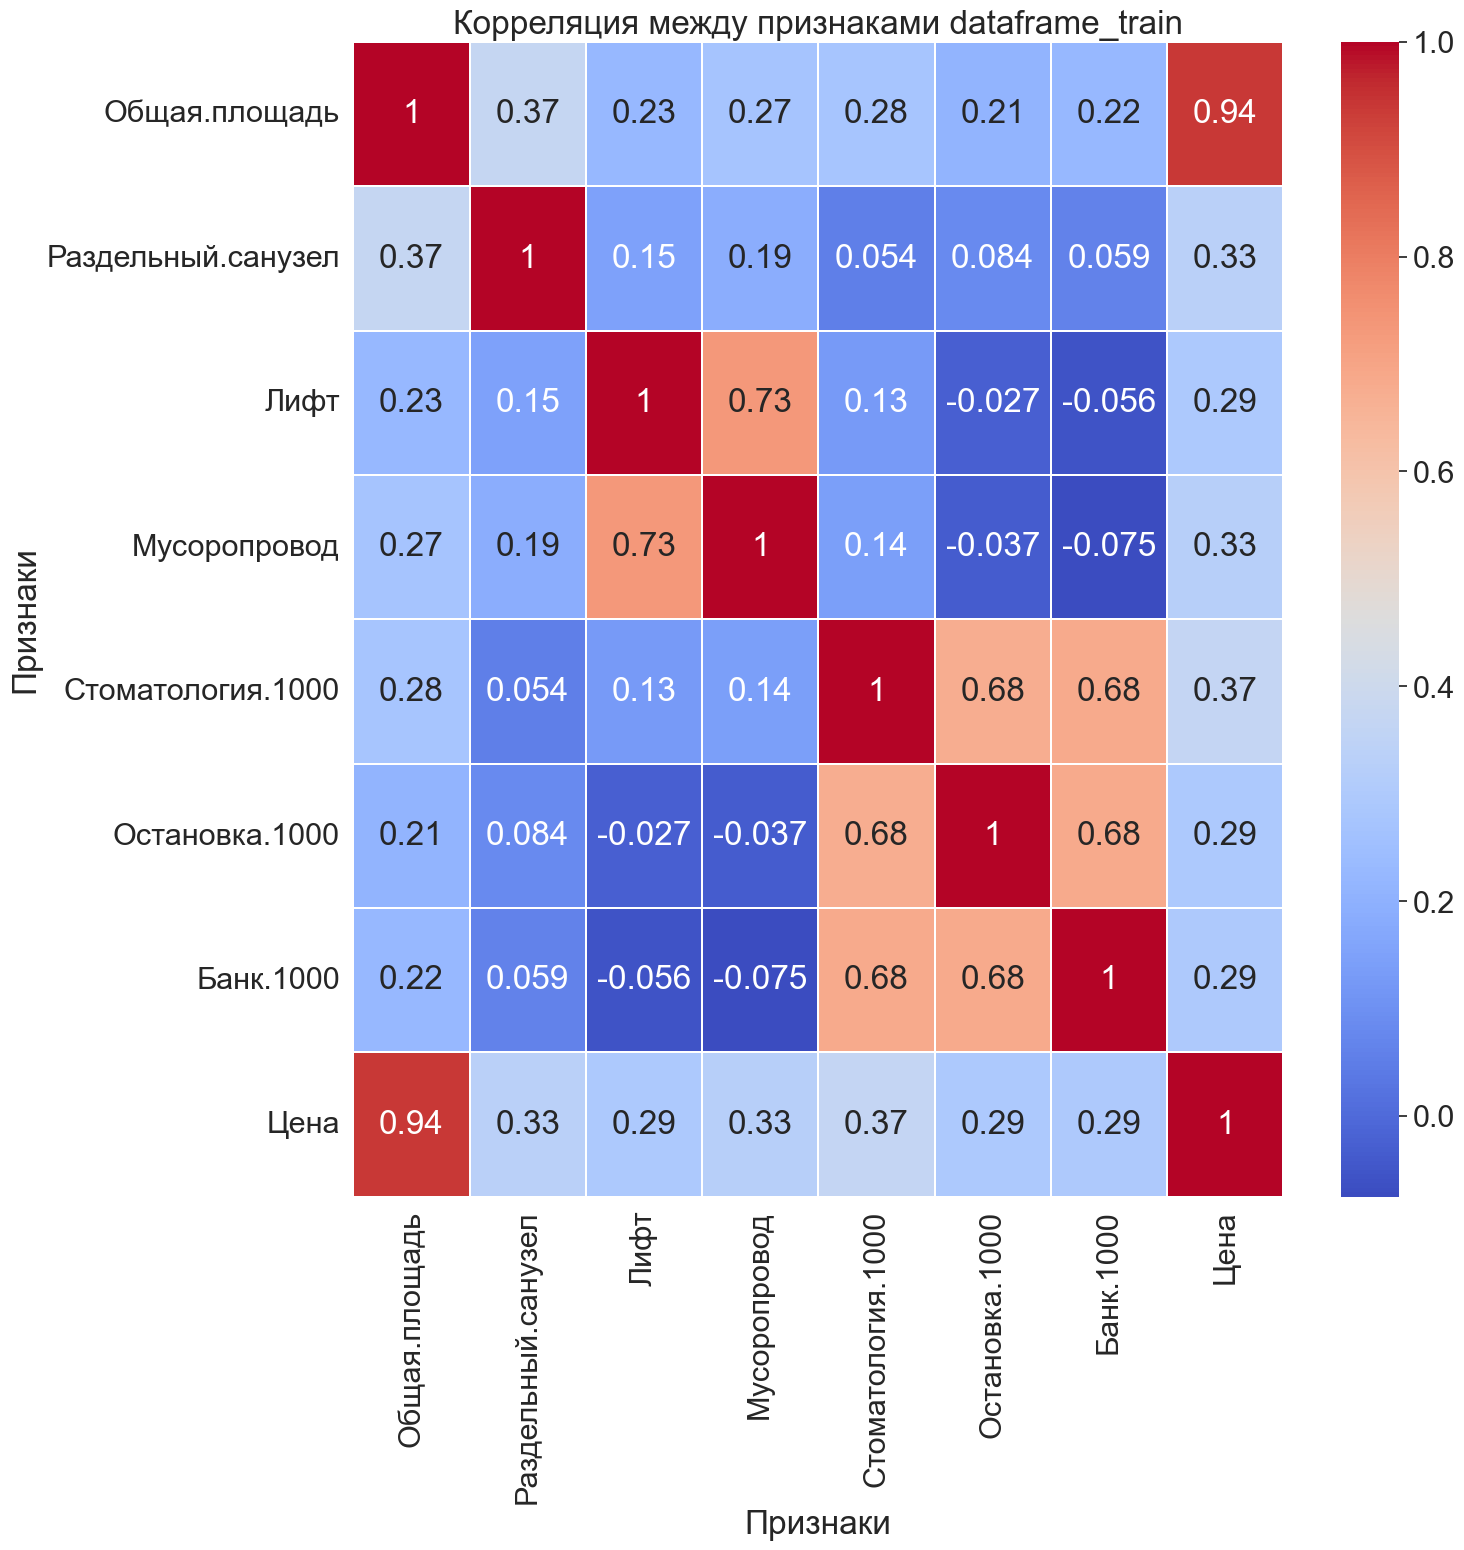

In [281]:
# Создает новый датафрейм dataframe_without_result_column, который содержит все столбцы из датафрейма, кроме цены
dataframe_without_result_column = dataframe_train.drop(result_column, axis=1)

# Вычислим матрицу корреляции между всеми столбцами в датафрейме, берём модуль от значений, преобразуем матрицу в серию и сортируем её по возрастанию
corr_series = dataframe_without_result_column.corr().abs().stack().sort_values()

# Удаляем дубликаты из серии корреляции - те пары признаков, которые имеют одинаковую корреляцию
corr_series = corr_series[~corr_series.duplicated()]

threshold = 0.75

# Создаём множество из имен столбцов, которые имеют корреляцию с другими столбцами больше порогового значения и не равную 1 (так как корреляция признака с самим собой равна 1)
drop_columns = set([feature2 for (feature1, feature2), corr in corr_series.items() if corr > threshold and corr != 1])
# Удаляем столбцы из изначального датафрейма, которые принадлежат множеству drop_columns
dataframe_train.drop(drop_columns, axis=1, inplace=True)

draw_large_heat_map(dataframe_train, True, 15)

In [282]:
x = dataframe_train.drop(result_column, axis=1)
y = dataframe_train[result_column]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=7)

## Построение регрессионных моделей

In [283]:
def get_criteria(model, x_test, y_test) -> pd.Series:
    """
    Вычисляет и возвращает различные критерии для оценки модели регрессии
    :param model: Модель
    :param x_test: Тестовые данные
    :param y_test: Тестовые данные
    :return:
    """
    # Проверяем, что модель имеет нужные методы
    if hasattr(model, "predict"):
        y_pred = model.predict(x_test) # Прогнозируем значения зависимой переменной
    elif hasattr(model, "fit"):
        y_pred = model.fit(x_test)[0] # Обучаем модель и получаем прогнозы
    else:
        raise ValueError("Модель должна иметь метод predict или fit.") # Выдаем исключение

    # Вычисляем коэффициент детерминации R^2
    r_sq = r2_score(y_test, y_pred)

    # Вычисляем скорректированный коэффициент детерминации Adj R^2
    n_samples, n_features = x_test.shape # Количество наблюдений и признаков
    adj_r_sq = 1 - (1 - r_sq) * (n_samples - 1) / (n_samples - n_features - 1)

    # Вычисляем среднеквадратическую ошибку RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Вычисляем информационный критерий Акаике AIC
    log_likelihood = -0.5 * (n_samples * np.log(2 * np.pi) + n_samples * np.log( np.sum(((y_test - y_pred) ** 2)) / n_samples) + n_samples)
    aic = 2 * n_features - 2 * log_likelihood

    # Вычисляем информационный критерий Байеса BIC
    bic = n_features * np.log(n_samples) - 2 * log_likelihood

    res = pd.Series({
        "R^2": r_sq,
        "Adj R^2": adj_r_sq,
        "RMSE": rmse,
        "AIC": aic,
        "BIC": bic
    })
    return res

In [284]:
def get_stats_vals(fitted_model, x_test, y_test):

    n, p = x_test.shape

    mse = mean_squared_error(y_test, fitted_model.predict(x_test))
    std_errs = np.sqrt(np.diag(np.linalg.inv(np.dot(x_test.T, x_test))) * mse)
    coefs = fitted_model.coef_ if hasattr(fitted_model,
                                          "coef_") else fitted_model.params.values

    t_values = coefs / std_errs
    p_values = 2 * (1 - t.cdf(np.abs(t_values), df=n - p - 1))

    confidence_level = 0.95
    alpha = 1 - confidence_level
    t_critical = t.ppf(1 - alpha / 2, n - p - 1)
    conf_intervals = list(
        zip(coefs - t_critical * std_errs, coefs + t_critical * std_errs))
    is_hypothesis_rejected = np.abs(t_values) > t_critical

    data = {
        'Название': x_test.columns,
        'Оценка': coefs,
        'Стандартная ошибка': std_errs,
        't-значение': t_values,
        'p-значение': p_values,
        '95% доверительный интервал': conf_intervals,
        'Отвергается ли гипотеза': is_hypothesis_rejected
    }

    # Формируем датафрейм из словаря
    data = pd.DataFrame(data)
    return data

In [285]:
def sk_get_best(unfitted_model, params, x_train, y_train):

    grid = GridSearchCV(unfitted_model, params, cv=5,
                        scoring="neg_mean_squared_error")
    grid.fit(x_train, y_train)
    return grid.best_estimator_


def sm_get_best(unfitted_model, params):
    kfolder = KFold(n_splits=5, shuffle=True)
    param_keys = params.keys()
    fitted = []
    for param in product(*params.values()):
        param_dict = dict(zip(param_keys, param))
        for train_idx, test_idx in kfolder.split(x):
            x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            cur_model = unfitted_model(y_train, x_train, **param_dict)
            fitted_model = cur_model.fit()
            y_pred = fitted_model.predict(x_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            fitted.append({"model": fitted_model, "score": rmse})
    return min(fitted, key=lambda m_dict: m_dict["score"])["model"]

In [286]:
def show_model(model_name, stat_vals, coefficients):
    print(model_name)
    print(stat_vals[:-1])
    print(coefficients)

In [287]:
def scikit_build(cur_model_name, cur_model_params, list_models):
    # Выбираем метод отбора признаков
    model = cur_model_params["model"]

    if cur_model_params["selector"] == "SFS":
        selector = SequentialFeatureSelector(model)
        selector.fit(x_train, y_train)
        features = selector.get_support()
        x_train_sel, x_test_sel = x_train.loc[:, features], x_test.loc[:, features]

    elif cur_model_params["selector"] == "Poly":
        selector = PolynomialFeatures(degree=2)
        x_train_sel, x_test_sel = selector.fit_transform(
            x_train), selector.fit_transform(x_test)
    else:
        x_train_sel, x_test_sel = x_train, x_test

    # Находим лучшие параметры модели с помощью GridSearchCV
    fitted_model = sk_get_best(model, cur_model_params["params"], x_train_sel, y_train)

    # Вычисляем критерии качества модели
    model_stats = get_criteria(fitted_model, x_test_sel, y_test)

    model_stats["Название модели"] = cur_model_name

    list_models = list_models.append(model_stats, ignore_index=True)

    coefficients = None
    if cur_model_params["selector"] not in ["Poly", "Not parametric"]:
        # Вычисляем информацию о коэффициентах
        coefficients = get_stats_vals(fitted_model, x_test_sel, y_test)
    else:
        coefficients = "Не получается получить информацию о коэффициентах"
    show_model(cur_model_name, model_stats, coefficients)
    return list_models

In [288]:
def statsmodels_build(cur_model_name, cur_model_params, list_models):
    # Находим лучшие параметры модели с помощью GridSearchCV
    fitted_model = sm_get_best(cur_model_params["model"], cur_model_params["params"])
    # Вычисляем критерии качества модели
    model_stats = get_criteria(fitted_model, x_test, y_test)
    model_stats["Название модели"] = cur_model_name
    # Добавляем статистики модели в датафрейм
    list_models = list_models.append(model_stats, ignore_index=True)
    values = get_stats_vals(fitted_model, x_test, y_test)
     # Выводим статистики модели на экран
    show_model(cur_model_name, model_stats, values)

    return list_models

### Линейная регрессия (МНК)
Линейная регрессия (МНК) - это метод, который строит линейное уравнение для описания зависимости между одной или несколькими независимыми переменными и зависимой переменной. МНК минимизирует сумму квадратов разности между прогнозируемыми и наблюдаемыми значениями.

In [289]:
list_models = pd.DataFrame(
    {
        "Название модели": [],
        "R^2": [],
        "Adj R^2": [],
        "RMSE": [],
        "AIC": [],
        "BIC": []
    }
)

linear_parameters = {
    "model": LinearRegression(),
    "params": {
        'fit_intercept': [True, False],
        'positive': [True, False],
    },
    "selector": "SFS",
    "kind": "sk"
}

list_models = scikit_build(
    "Линейная регрессия",
    linear_parameters,
    list_models
)

Линейная регрессия
R^2             0.892566
Adj R^2         0.891217
RMSE       323082.386868
AIC          6860.836169
BIC          6871.315353
dtype: object
            Название        Оценка  Стандартная ошибка  t-значение  \
0      Общая.площадь  5.390386e+06        94130.021915   57.265319   
1               Лифт  1.476439e+05        39289.425556    3.757854   
2  Стоматология.1000  6.987201e+05       124491.528686    5.612591   

     p-значение               95% доверительный интервал  \
0  0.000000e+00    (5204955.27957582, 5575816.158474435)   
1  2.154292e-04  (70246.15178800371, 225041.72706350716)   
2  5.505546e-08   (453479.3207132801, 943960.8568377082)   

   Отвергается ли гипотеза  
0                     True  
1                     True  
2                     True  


### Лассо регрессия
Лассо регрессия - это метод, который использует L1-регуляризацию для уменьшения сложности модели и отбора признаков. Лассо регрессия может обнулять коэффициенты незначимых признаков и оставлять только наиболее важные.

In [290]:
linear_parameters = {
    "model": Lasso(),
    "params": {
        'alpha': [0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'positive': [True, False],
        'warm_start': [True, False],
        "selection": ["cyclic", "random"]
    },
    "selector": None,
    "kind": "sk"
}

list_models = scikit_build(
    "Лассо регрессия",
    linear_parameters,
    list_models
)

Лассо регрессия
R^2             0.891591
Adj R^2         0.888362
RMSE       324545.035532
AIC          6871.031408
BIC          6895.482838
dtype: object
             Название        Оценка  Стандартная ошибка  t-значение  \
0       Общая.площадь  5.312645e+06       113034.112837   47.000366   
1  Раздельный.санузел  0.000000e+00        44105.588749    0.000000   
2                Лифт  9.623967e+04        65413.150647    1.471259   
3        Мусоропровод  1.224516e+05        69950.867661    1.750537   
4   Стоматология.1000  3.179901e+05       199257.867800    1.595872   
5      Остановка.1000  3.830660e+05       149369.461226    2.564554   
6           Банк.1000  1.703990e+05       220839.453334    0.771597   

   p-значение                95% доверительный интервал  \
0    0.000000     (5089954.99880562, 5535334.284963956)   
1    1.000000   (-86892.86419673529, 86892.86419673529)   
2    0.142559   (-32631.43881048418, 225110.7737795798)   
3    0.081331  (-15359.317348128854, 260

### Гребневая регрессия
Гребневая регрессия - это метод, который использует L2-регуляризацию для уменьшения сложности модели и борьбы с переобучением. Гребневая регрессия может уменьшать коэффициенты признаков, но не обнулять их.

In [291]:
linear_parameters = {
    "model": Ridge(),
    "params": {
        'alpha': [0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
    },
    "selector": None,
}

list_models = scikit_build(
    "Гребневая регрессия",
    linear_parameters,
    list_models
)

Гребневая регрессия
R^2             0.891593
Adj R^2         0.888363
RMSE       324542.418924
AIC          6871.027489
BIC           6895.47892
dtype: object
             Название        Оценка  Стандартная ошибка  t-значение  \
0       Общая.площадь  5.328922e+06       113033.201512   47.144746   
1  Раздельный.санузел -4.326535e+04        44105.233153   -0.980957   
2                Лифт  9.776963e+04        65412.623261    1.494660   
3        Мусоропровод  1.279909e+05        69950.303690    1.829740   
4   Стоматология.1000  3.011131e+05       199256.261306    1.511185   
5      Остановка.1000  3.983700e+05       149368.256951    2.667032   
6           Банк.1000  1.719161e+05       220837.672841    0.778473   

   p-значение                 95% доверительный интервал  \
0    0.000000     (5106233.783390546, 5551609.478729123)   
1    0.327623   (-130157.51063910787, 43626.81662672466)   
2    0.136345  (-31100.434230496292, 226639.70034233987)   
3    0.068556      (-9818.912352

### Elastic-Net
Elastic-Net - это метод, который комбинирует L1- и L2-регуляризацию для достижения баланса между отбором признаков и снижением переобучения. Elastic-Net может быть более эффективным, чем Лассо или Гребень, когда признаков много и они коррелируют между собой.

In [292]:
linear_parameters = {
    "model": ElasticNet(),
    "params": {
        'alpha': [0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.2, 0.5, 0.8],
        'fit_intercept': [True, False],
    },
    "selector": None,
}
list_models = scikit_build (
    "Elastic-Net",
    linear_parameters,
    list_models
)

Elastic-Net
R^2             0.885632
Adj R^2         0.882226
RMSE       333344.554048
AIC          6884.033046
BIC          6908.484476
dtype: object
             Название        Оценка  Стандартная ошибка  t-значение  \
0       Общая.площадь  4.976923e+06       116098.851656   42.867980   
1  Раздельный.санузел  2.681255e+03        45301.441104    0.059187   
2                Лифт  1.037047e+05        67186.723395    1.543530   
3        Мусоропровод  1.502954e+05        71847.473333    2.091868   
4   Стоматология.1000  3.383000e+05       204660.425551    1.652982   
5      Остановка.1000  3.932454e+05       153419.374784    2.563206   
6           Банк.1000  2.220886e+05       226827.161189    0.979109   

   p-значение                95% доверительный интервал  \
0    0.000000    (4748195.764249301, 5205650.795978578)   
1    0.952853   (-86567.57027927125, 91930.07962730303)   
2    0.124048  (-28660.51416000555, 236069.96546190802)   
3    0.037524    (8748.016061109927, 291842.

### Метод наименьших углов (Least-angle regression)
Метод наименьших углов (Least-angle regression) - это метод, который похож на Лассо, но использует более эффективный алгоритм для нахождения оптимальных коэффициентов. Метод наименьших углов также может обрабатывать случаи, когда число признаков превышает число наблюдений.

In [293]:
linear_parameters = {
    "model": Lars(),
    "params": {
        'n_nonzero_coefs': [100, 500, 1000],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    "selector": "SFS",
}
list_models = scikit_build(
    "Метод наименьших углов",
    linear_parameters,
    list_models
)

Метод наименьших углов
R^2             0.892566
Adj R^2         0.891217
RMSE       323082.386868
AIC          6860.836169
BIC          6871.315353
dtype: object
            Название        Оценка  Стандартная ошибка  t-значение  \
0      Общая.площадь  5.390386e+06        94130.021915   57.265319   
1               Лифт  1.476439e+05        39289.425556    3.757854   
2  Стоматология.1000  6.987201e+05       124491.528686    5.612591   

     p-значение               95% доверительный интервал  \
0  0.000000e+00    (5204955.279575805, 5575816.15847442)   
1  2.154292e-04  (70246.15178800358, 225041.72706350707)   
2  5.505546e-08   (453479.3207132807, 943960.8568377087)   

   Отвергается ли гипотеза  
0                     True  
1                     True  
2                     True  


### Байесовская регрессия
Байесовская регрессия - это метод, который использует байесовский подход для оценки параметров модели. Байесовская регрессия учитывает априорные знания о параметрах и обновляет их на основе данных. Байесовская регрессия также может дать интервалы доверия для прогнозов.

In [294]:
linear_parameters = {
    "model": BayesianRidge(),
    "params": {
        'n_iter': [200, 400, 600],
        'tol': [1e-4, 1e-5, 1e-6],
        'alpha_1': [1e-6, 1e-7, 1e-8],
        'alpha_2': [1e-6, 1e-7, 1e-8],
        'lambda_1': [1e-6, 1e-7, 1e-8],
        'lambda_2': [1e-6, 1e-7, 1e-8],
    },
    "selector": None,
}
list_models = scikit_build(
    "Байесовская регрессия",
    linear_parameters,
    list_models
)

Байесовская регрессия
R^2             0.891779
Adj R^2         0.888556
RMSE       324262.677014
AIC          6870.608397
BIC          6895.059827
dtype: object
             Название        Оценка  Стандартная ошибка  t-значение  \
0       Общая.площадь  5.354929e+06       112935.771648   47.415700   
1  Раздельный.санузел -4.670903e+04        44067.216297   -1.059950   
2                Лифт  9.733434e+04        65356.240332    1.489289   
3        Мусоропровод  1.263011e+05        69890.009472    1.807141   
4   Стоматология.1000  2.986740e+05       199084.510792    1.500237   
5      Остановка.1000  4.003056e+05       149239.507798    2.682303   
6           Банк.1000  1.661046e+05       220647.320058    0.752806   

   p-значение                95% доверительный интервал  \
0    0.000000    (5132432.823912067, 5577424.624139829)   
1    0.290256   (-133526.2998220417, 40108.23266542265)   
2    0.137752  (-31424.65064124338, 226093.32277965028)   
3    0.072019   (-11389.8754162780

### Обобщенная линейная регрессия (обобщенный МНК)
Обобщенная линейная регрессия (обобщенный МНК) - это метод, который расширяет линейную регрессию на случаи, когда зависимая переменная имеет не нормальное распределение или связана с независимыми переменными нелинейно. Обобщенный МНК использует функцию связи и функцию распределения для моделирования данных.

In [295]:
linear_parameters = {
    "model": sm.GLS,
    "params": {
        'sigma': [0.1, 0.5, 1.0],
        'hasconst': [True, False],
        'cov_type': ['nonrobust', 'HC0', 'HC1', 'HC2', 'HC3', 'HAC'],
        'kernel': ['bartlett', 'uniform', 'parzen', 'quadratic', 'triangular', 'cosine'],
        'dew': [False, True]
    },
}
list_models = statsmodels_build(
    "Обобщённая линейная регрессия",
    linear_parameters,
    list_models
)

Обобщённая линейная регрессия
R^2             0.875003
Adj R^2          0.87128
RMSE       348490.475151
AIC           6905.62809
BIC           6930.07952
dtype: object
             Название        Оценка  Стандартная ошибка  t-значение  \
0       Общая.площадь  5.853449e+06       121373.946227   48.226573   
1  Раздельный.санузел -4.808289e+04        47359.767974   -1.015269   
2                Лифт  1.651791e+05        70239.435069    2.351658   
3        Мусоропровод  1.213941e+05        75111.951931    1.616176   
4   Стоматология.1000  1.880663e+05       213959.424501    0.878981   
5      Остановка.1000  8.855317e+05       160390.173371    5.521110   
6           Банк.1000  2.393516e+04       237133.333123    0.100935   

     p-значение                95% доверительный интервал  \
0  0.000000e+00    (5614329.448463217, 6092569.513979522)   
1  3.110219e-01  (-141386.84704585106, 45221.06381946302)   
2  1.951654e-02   (26799.699398468452, 303558.5349936391)   
3  1.073979e-01  (

### Взвешенный МНК
Взвешенный МНК - это метод, который дает разные веса наблюдениям в зависимости от их точности или важности. Взвешенный МНК минимизирует сумму взвешенных квадратов разности между прогнозируемыми и наблюдаемыми значениями.

In [296]:
linear_parameters = {
    "model": sm.WLS,
    "params": {
        'missing': ['none', 'drop', 'raise'],
        'hasconst': [True, False],
        'cov_type': ['nonrobust', 'HC0', 'HC1', 'HC2', 'HC3', 'HAC'],
        'kernel': ['bartlett', 'uniform', 'parzen', 'quadratic', 'triangular', 'cosine']
    },
}
list_models = statsmodels_build(
    "Взвешенный МНК",
    linear_parameters,
    list_models
)

Взвешенный МНК
R^2             0.875943
Adj R^2         0.872248
RMSE       347178.392231
AIC          6903.794824
BIC          6928.246254
dtype: object
             Название        Оценка  Стандартная ошибка  t-значение  \
0       Общая.площадь  5.845182e+06       120916.967649   48.340458   
1  Раздельный.санузел -2.850717e+04        47181.456235   -0.604203   
2                Лифт  1.608277e+05        69974.980315    2.298360   
3        Мусоропровод  1.129173e+05        74829.151923    1.509001   
4   Стоматология.1000  2.049347e+05       213153.857272    0.961440   
5      Остановка.1000  8.486828e+05       159786.296875    5.311362   
6           Банк.1000  9.557917e+04       236240.515046    0.404584   

     p-значение                95% доверительный интервал  \
0  0.000000e+00    (5606961.808847084, 6083401.278174189)   
1  5.462917e-01  (-121459.82880977922, 64445.49455313603)   
2  2.242018e-02  (22969.257830414106, 298686.08347988647)   
3  1.326418e-01  (-34504.39913338

### Полиномиальная регрессия
Полиномиальная регрессия - это метод регрессионного анализа, в котором зависимость между независимой переменной x и зависимой переменной y моделируется как полином n-й степени в x. Полиномиальная регрессия может быть использована для аппроксимации нелинейных данных и изучения сложных и изогнутых зависимостей.

In [297]:
linear_parameters = {
    "model": LinearRegression(),
    "params": {
        'fit_intercept': [True, False],
        'positive': [True, False],
    },
    "selector": "Poly",
}

list_models = scikit_build(
    "Полиномиальная регрессия",
    linear_parameters,
    list_models
)

Полиномиальная регрессия
R^2             0.893461
Adj R^2         0.874843
RMSE       321733.176132
AIC          6924.802355
BIC          7050.552567
dtype: object
Не получается получить информацию о коэффициентах


### Непараметрическая регрессия
Непараметрическая регрессия - это метод регрессионного анализа, в котором не делается предположений о виде функциональной зависимости между независимой переменной x и зависимой переменной y. Вместо этого форма зависимости определяется на основе данных, используя некоторые гибкие и адаптивные алгоритмы. Непараметрическая регрессия может быть использована для аппроксимации сложных и неизвестных данных и изучения локальных и глобальных свойств зависимости.

In [298]:
linear_parameters = {
    "model": KNeighborsRegressor(),
    "params": {
        "n_neighbors": [2, 3, 4, 5, 6],
    },
    "selector": "Not parametric"
}
list_models = scikit_build(
    "Непараметрическая регрессия",
    linear_parameters,
    list_models
)

Непараметрическая регрессия
R^2             0.716178
Adj R^2         0.707724
RMSE       525127.916143
AIC          7104.903148
BIC          7129.354578
dtype: object
Не получается получить информацию о коэффициентах


### Ядерная регрессия
Ядерная регрессия - это непараметрический статистический метод, позволяющий оценить условное математическое ожидание случайной величины по заданному набору данных. Его смысл заключается в поиске нелинейного отношения между парой случайных величин X и Y с помощью локально взвешенного среднего, где веса определяются ядром. Ядро - это симметричная неотрицательная функция, интеграл которой равен единице. Ядро определяет форму и ширину окна, в котором учитываются соседние точки данных при оценке функции регрессии.

In [299]:
#kernel_model = sm.nonparametric.KernelReg(y_train, x_train, var_type="".join(
#    ["c" if len(x_train[col].value_counts()) > 2 else "u" for col in
#     x_train.columns]))
#kernel_stats = get_criteria(kernel_model, x_test, y_test)
#kernel_stats["Model name"] = "Ядерная регрессия"
#list_models.append(kernel_stats)
#show_model("Ядерная регрессия", kernel_stats, "Невозможно получить информацию о коэффициентах")

## Сравнение регрессионных моделей

In [300]:
print(list_models)

                 Название модели       R^2   Adj R^2           RMSE  \
0             Линейная регрессия  0.892566  0.891217  323082.386868   
1                Лассо регрессия  0.891591  0.888362  324545.035532   
2            Гребневая регрессия  0.891593  0.888363  324542.418924   
3                    Elastic-Net  0.885632  0.882226  333344.554048   
4         Метод наименьших углов  0.892566  0.891217  323082.386868   
5          Байесовская регрессия  0.891779  0.888556  324262.677014   
6  Обобщённая линейная регрессия  0.875003  0.871280  348490.475151   
7                 Взвешенный МНК  0.875943  0.872248  347178.392231   
8       Полиномиальная регрессия  0.893461  0.874843  321733.176132   
9    Непараметрическая регрессия  0.716178  0.707724  525127.916143   

           AIC          BIC  
0  6860.836169  6871.315353  
1  6871.031408  6895.482838  
2  6871.027489  6895.478920  
3  6884.033046  6908.484476  
4  6860.836169  6871.315353  
5  6870.608397  6895.059827  
6  6905.